In [1]:
%%capture 
!pip install category_encoders==2.*
!pip install pandas_profiling==2.*

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#data split
from sklearn.model_selection import train_test_split
# encoders
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
#metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#pipeline
from sklearn.pipeline import make_pipeline
# machine learning
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.ensemble import RandomForestRegressor
# Boosted Models
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
# Permutation Importance
from sklearn.inspection import permutation_importance 




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/My Drive/Project 2
%ls

/content/gdrive/My Drive/Project 2
'Car details v3.csv'
'CO2 Emissions_Canada.csv'
 data.csv
 Figure_2__Diesel_use_for_road_transport_overtook_petrol_use_from_2005.csv
'Fuel consumption 2019 (1).csv'
 FuelConsumption.csv
'table_export (1).csv'


In [5]:
#import a CSV file into a DataFrame
df = pd.read_csv('CO2 Emissions_Canada.csv') 

In [6]:
df.head()

Make       Model  ... Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)
0  ACURA         ILX  ...                          33                  196
1  ACURA         ILX  ...                          29                  221
2  ACURA  ILX HYBRID  ...                          48                  136
3  ACURA     MDX 4WD  ...                          25                  255
4  ACURA     RDX AWD  ...                          27                  244

[5 rows x 12 columns]



> # **EDA**







In [7]:
# Checking more information about our  dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

as we can see we have 12 columns and 7385 observations rows There are 7 numerical variables and 5 categorical variables in the dataset






# **Plotting histograms**

with many dimensions we'd like to know how all dimensions relate to one another.
next step we plotting the histogram of all numerical features.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe561b17610>,
      dtype=object)

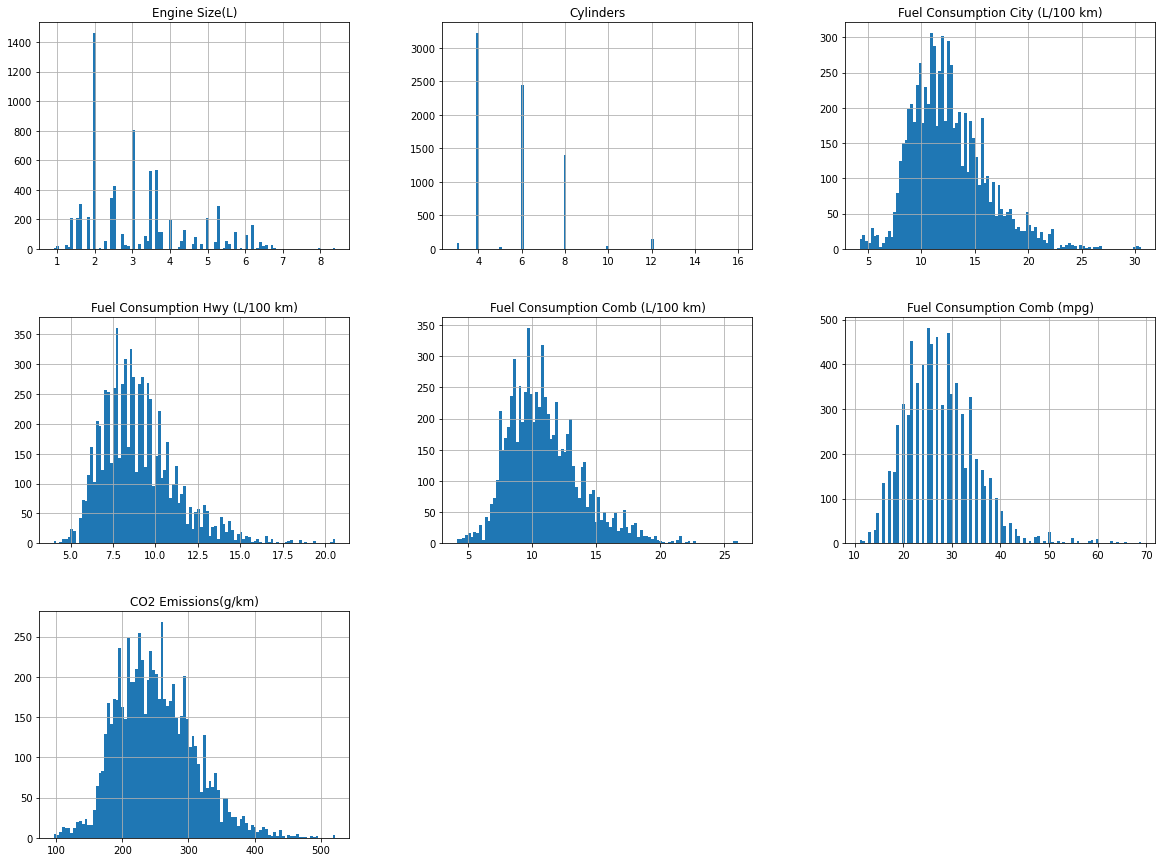

In [8]:
df.hist(figsize=(20,15),bins=100)

In [9]:
#looking for any missing values in the data set 
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64



> **OUR TARGET**

our target is to predicit the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving which is **CO2 Emissions(g/km)** column .




Text(0, 0.5, 'CO2 Emissions(g/km)')

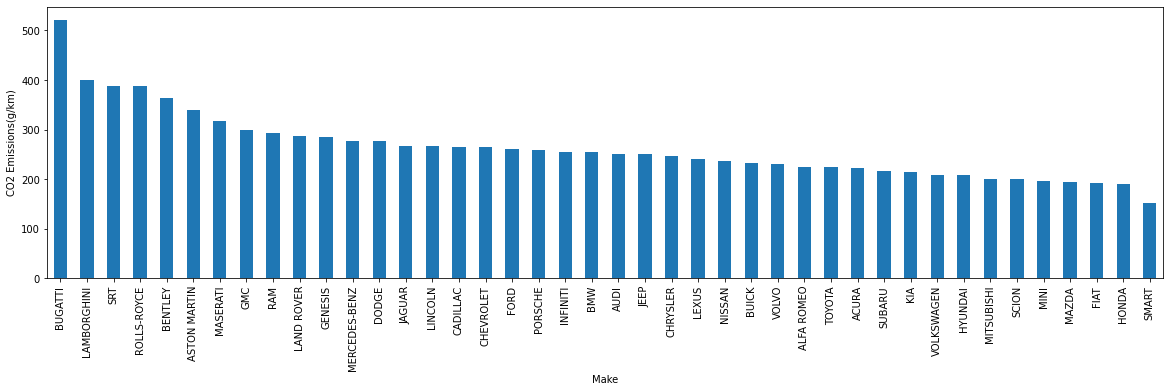

In [10]:
#which vehicle brands emitt higher carbon emissions
plt.figure(figsize=(20,5))
df.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('CO2 Emissions(g/km)')

Text(0, 0.5, 'CO2 Emissions(g/km)')

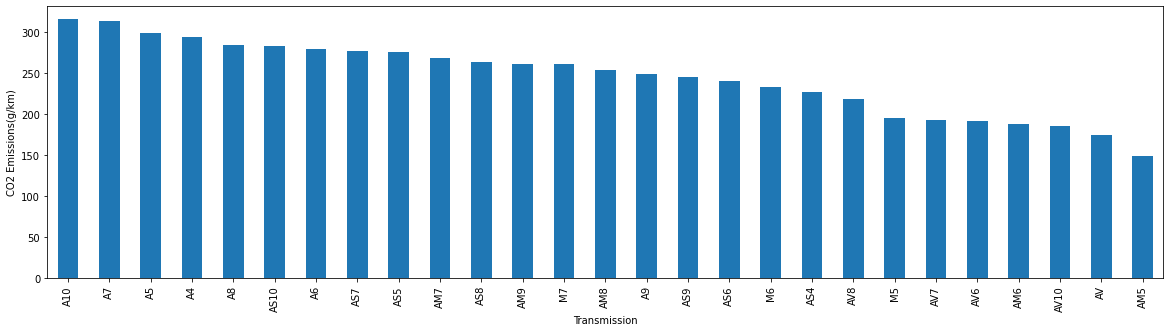

In [11]:
#how Transmission type relate to our target 
plt.figure(figsize=(20,5))
df.groupby(['Transmission'])['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('CO2 Emissions(g/km)')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


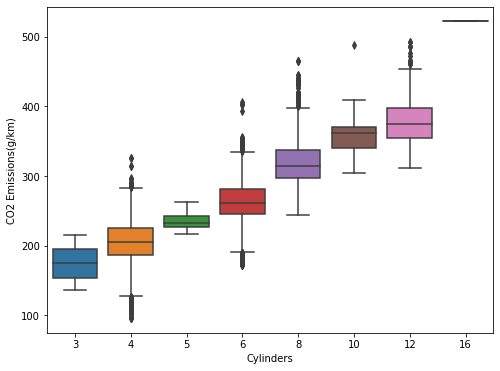

In [12]:
#how vehcile Cylinders relate to our target 
plt.figure(figsize=(8,6))
sns.boxplot(df['Cylinders'],df['CO2 Emissions(g/km)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


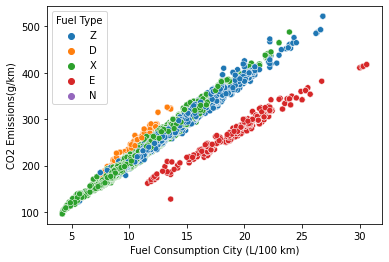

In [13]:
# is the Fuel Type has impact on CO2 Emissions (g/km) combined by Fuel Consumption City
sns.scatterplot(df['Fuel Consumption City (L/100 km)'],df['CO2 Emissions(g/km)'],hue=df['Fuel Type'])

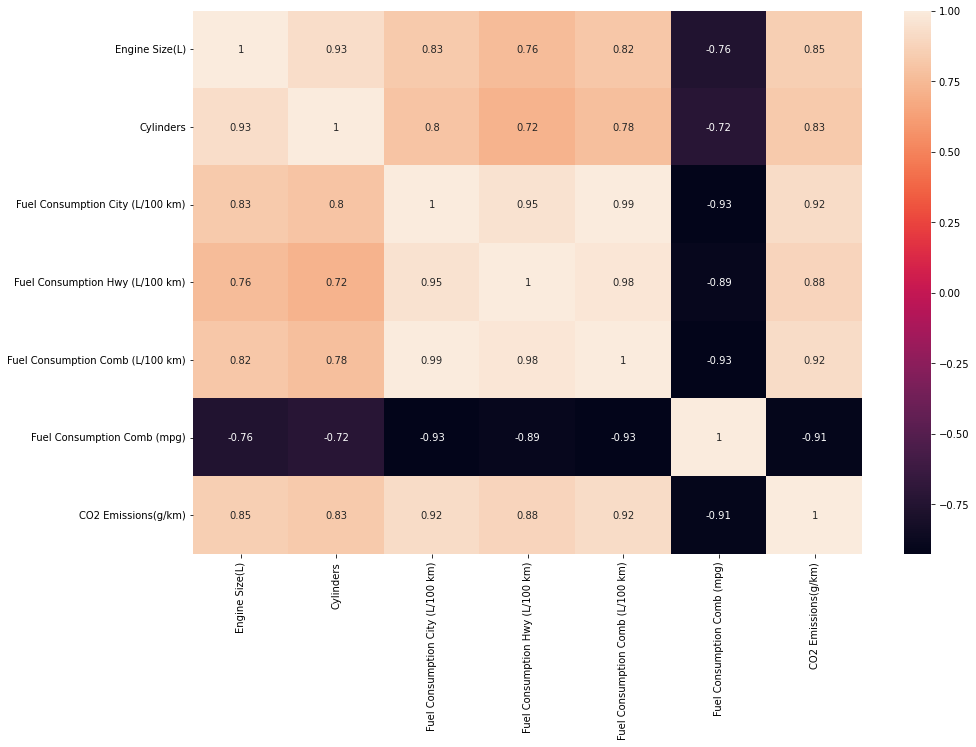

In [14]:
#corelation plot 'heat map'
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)


 we can concloude that  Fuel Consumption Comb (L/100 km) is highly corelated with Fuel Consumption City (L/100 km) and Fuel Consumption Hwy (L/100 km) with corelation of 0.99 and 0.98 so we can drop Fuel Consumption Comb since it is redundant feature 

**negtive corrlation**


as we can see in our corr heat map that the Fuel Consumption Comb (mpg) is negatively corelated with CO2 Emissions , what that mean ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


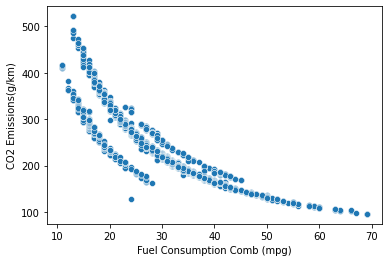

In [15]:
sns.scatterplot(df['Fuel Consumption Comb (mpg)'],df['CO2 Emissions(g/km)'])


we obsereve that as number of miles a vehicle can travel with one gallon increases the carbon Emissions decreases 



> **Define ML problems**

after we get enough information about data let's start work toward creating the best models 


> **I.DATA WRANGLING**



In [16]:
def wrangle(filepath):


  df = pd.read_csv(filepath)

  #columns name
  df.columns = df.columns.str.replace(' ', '_')
  df.columns = df.columns.str.lower()

  #engineer a new features 
  df['n_gears'] = df['transmission'].apply(lambda x:x[-1])
  df['n_gears'] = df['n_gears'].replace('V','0').astype('int64')
  df['transmission'] = df['transmission'].str.strip('4,5,6,7,9,8,10')

  #drop the redundant feature
  df.drop(columns=['fuel_consumption_comb_(l/100_km)'], inplace=True)
  return df
filepath = 'CO2 Emissions_Canada.csv'
df = wrangle(filepath)

In [17]:
df.head()


make       model  ... co2_emissions(g/km)  n_gears
0  ACURA         ILX  ...                 196        5
1  ACURA         ILX  ...                 221        6
2  ACURA  ILX HYBRID  ...                 136        7
3  ACURA     MDX 4WD  ...                 255        6
4  ACURA     RDX AWD  ...                 244        6

[5 rows x 12 columns]

In [18]:
X =df.drop(columns= 'co2_emissions(g/km)')
y=df['co2_emissions(g/km)']

<function matplotlib.pyplot.show>

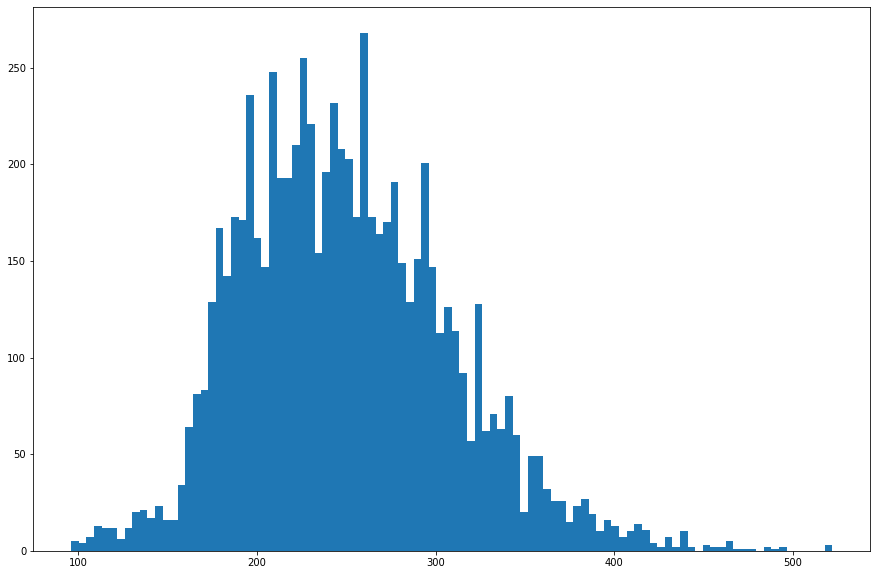

In [19]:
# target distribution 
plt.figure(figsize=(15,10))
plt.hist(y, bins=100)
plt.show

In [20]:
#plt.scatter(df['engine_size(l)'], df['co2_emissions(g/km)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


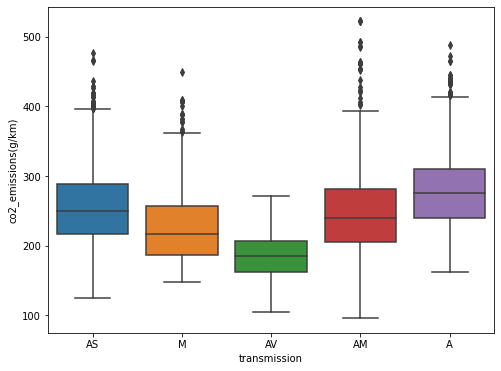

In [21]:
#transmission type without gears 
plt.figure(figsize=(8,6))
sns.boxplot(df['transmission'],df['co2_emissions(g/km)'])

* A = Automatic
* AM = Automated manual
* AS = Automatic with select shift
* AV = Continuously variable
* M = Manual


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


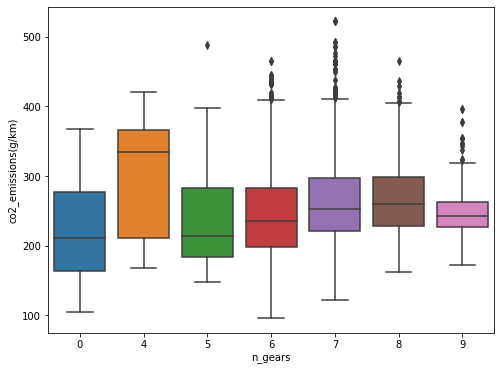

In [22]:
#transmission gears without the type 
plt.figure(figsize=(8,6))
sns.boxplot(df['n_gears'],df['co2_emissions(g/km)'])

# II. Split Data

Split **target vector** from **feature matrix**.

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

In [24]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=.2, random_state=42)

In [25]:
X_train.head()


make        model  ... fuel_consumption_comb_(mpg)  n_gears
6590      BMW  M240i Coupe  ...                          29        8
6274   NISSAN     Frontier  ...                          22        5
2251     AUDI   S4 QUATTRO  ...                          24        6
3149  PORSCHE     CAYMAN S  ...                          29        7
4362    VOLVO       V90 T5  ...                          32        8

[5 rows x 11 columns]

# III. Establish Baseline

In [26]:
y_pred = [y_train.mean()] * len(y_train) 
print ('mean carbon dioxide emission per vehicle: ', y_train.mean() )
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))


mean carbon dioxide emission per vehicle:  250.93957345971563
Baseline MAE: 46.596760918603415


**Baseline** : if I always guess the co2 emission per vehcile is 251 g/kg I will be off by 46.5 g/kg 
# we gonna try to beat the 46.5 

**Build Model**


In [40]:
model = make_pipeline(
    OrdinalEncoder(), 
    StandardScaler(),
    LinearRegression( n_jobs=-1)
    )

model.fit(X_train, y_train);

In [46]:
model_ridge = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    StandardScaler(),
    Ridge(alpha=1.0)
)

model_ridge.fit(X_train, y_train);

In [68]:
model_rf = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(), 
    RandomForestRegressor(random_state=101,  n_jobs=-1, n_estimators=115 )
)

model_rf.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['make', 'model', 'vehicle_class',
                                      'transmission', 'fuel_type'],
                                mapping=[{'col': 'make',
                                          'data_type': dtype('O'),
                                          'mapping': BMW               1
NISSAN            2
AUDI              3
PORSCHE           4
VOLVO             5
JAGUAR            6
MITSUBISHI        7
MASERATI          8
HYUNDAI           9
DODGE            10
CADILLAC         11
LEXUS            12
GMC              13
TOYOTA           14
MAZDA            15
FORD             16
INFINITI         17
MERCEDES-BENZ    18
LAND ROVER       19
CHEVROLET        20
JEEP             21
CHRYSLER         22
RA...
STATION WAGON - SMALL       14
VAN - CARGO                 15
VAN - PASSENGER             16
NaN                         -2
dtype: int64},
                                         {'col': 'transmission'

In [30]:

model_xgb = make_pipeline(
    OrdinalEncoder(),
    
    XGBRegressor(random_state=101, n_jobs=-1) # learning_rate=0.1
)

model_xgb.fit(X_train,y_train);

[09:46:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.




> **Check Metrics**




In [69]:
def check_metrics(model):
  # print(model)
  print('Training MAE:', mean_absolute_error(y_train, model.predict(X_train)))
  print('Validation MAE:', mean_absolute_error(y_val, model.predict(X_val)))
  print('Validation R^2:', model.score(X_val, y_val))
  print('Validation R^2:', model.score(X_test, y_test))
  print()
  print()

models = [model, model_ridge, model_rf,  model_xgb]

for m in models:
  check_metrics(m)

Training MAE: 11.197161144558514
Validation MAE: 11.417357755559243
Validation R^2: 0.9028010674911287
Validation R^2: 0.9153924734667414


Training MAE: 1.8906386084798044
Validation MAE: 3.074629157444995
Validation R^2: 0.9921584581827063
Validation R^2: 0.9878476399730339


Training MAE: 0.835429685155443
Validation MAE: 1.8763899262636516
Validation R^2: 0.997633677176321
Validation R^2: 0.9924674303972426


Training MAE: 2.7739063655514933
Validation MAE: 2.9404712195723466
Validation R^2: 0.9950315069144215
Validation R^2: 0.9906367101627762




In [70]:
X_val_perm = X_val.copy()
perm_imp = permutation_importance(model_rf, X_val, y_val, random_state=42)

In [71]:
data_perm = {'imp_mean':perm_imp['importances_mean']}

In [73]:
df_perm = pd.DataFrame(data_perm, index=X_val.columns).sort_values(by = 'imp_mean')
df_perm.tail()

imp_mean
engine_size(l)                    0.005695
fuel_consumption_hwy_(l/100_km)   0.009574
fuel_consumption_city_(l/100_km)  0.013613
fuel_type                         0.234734
fuel_consumption_comb_(mpg)       2.054465

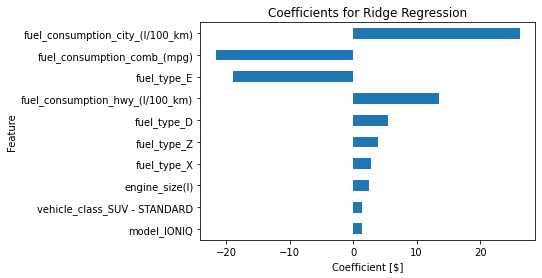

In [35]:
# coefficients represent the change in y for a 1 unit change in X
coefficients = model_ridge.named_steps['ridge'].coef_
features = model_ridge.named_steps['onehotencoder'].get_feature_names()
feat_imp = pd.Series(coefficients, index=features).sort_values(key=abs)
feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Coefficient [$]')
plt.ylabel('Feature')
plt.title('Coefficients for Ridge Regression');

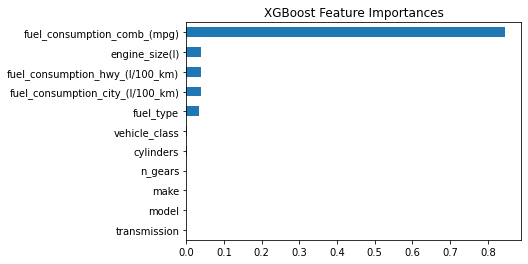

In [36]:
importances = model_xgb.named_steps['xgbregressor'].feature_importances_
imp = pd.DataFrame(data=importances, index=X_train.columns, columns=['importances'])
imp['importances'].sort_values().plot(kind='barh');
plt.title('XGBoost Feature Importances')
plt.show()

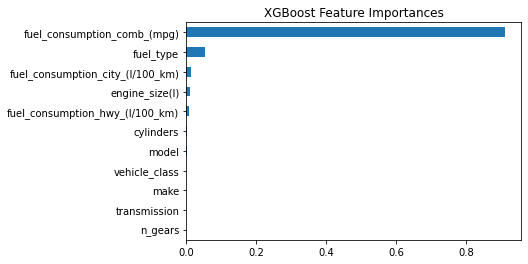

In [74]:
importances = model_rf.named_steps['randomforestregressor'].feature_importances_
imp = pd.DataFrame(data=importances, index=X_train.columns, columns=['importances'])
imp['importances'].sort_values().plot(kind='barh');
plt.title('XGBoost Feature Importances')
plt.show()